In [12]:
    import numpy as np
    import matplotlib.pyplot as plt
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from keras.utils.np_utils import to_categorical
    import random
     
    from keras.layers import Dropout
    from keras.layers import Flatten
    from keras.layers.convolutional import Conv2D
    from keras.layers.convolutional import MaxPooling2D
     
    from keras.models import Model

    np.random.seed(0)

In [13]:
    (X_train, y_train), (X_test, y_test)= mnist.load_data()
     
    print(X_train.shape)
    print(X_test.shape)

11493376/11490434 [==============================] - 8s 1us/step
(60000, 28, 28)
(10000, 28, 28)


In [14]:
    # STOP: Do not change the tests below. Your implementation should pass these tests. 
    assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
    assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
    assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
    assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


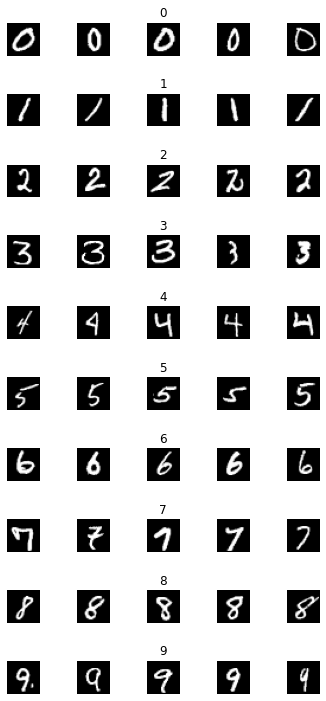

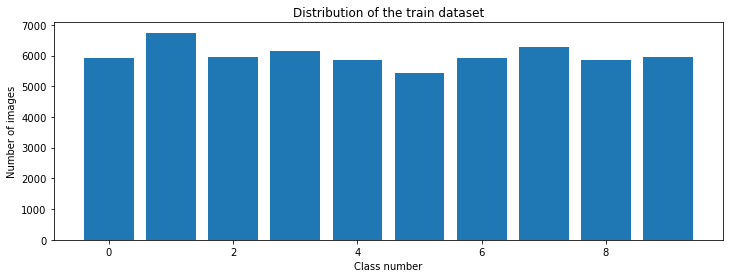

In [15]:
    num_of_samples=[]
     
    cols = 5
    num_classes = 10
     
    fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
    fig.tight_layout()
     
    for i in range(cols):
        for j in range(num_classes):
          x_selected = X_train[y_train == j]
          axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
          axs[j][i].axis("off")
          if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

    print(num_of_samples)
    plt.figure(figsize=(12, 4))
    plt.bar(range(0, num_classes), num_of_samples)
    plt.title("Distribution of the train dataset")
    plt.xlabel("Class number")
    plt.ylabel("Number of images")
    plt.show()

    X_train = X_train.reshape(60000, 28, 28, 1)
    X_test = X_test.reshape(10000, 28, 28, 1)
     
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
     
    X_train = X_train/255
    X_test = X_test/255

In [16]:
    # define the larger model
    def leNet_model():
      # create model
      model = Sequential()
      model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      
      model.add(Conv2D(15, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      
      model.add(Flatten())
      model.add(Dense(500, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(num_classes, activation='softmax'))
      # Compile model
      model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
      return model

In [17]:
    model = leNet_model()
    print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [18]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 20s 150ms/step - loss: 0.2586 - accuracy: 0.9187 - val_loss: 0.0627 - val_accuracy: 0.9835
Epoch 2/10
135/135 [==============================] - 20s 148ms/step - loss: 0.0745 - accuracy: 0.9762 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 3/10
135/135 [==============================] - 20s 146ms/step - loss: 0.0597 - accuracy: 0.9815 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 4/10
135/135 [==============================] - 19s 142ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 5/10
135/135 [==============================] - 18s 134ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0344 - val_accuracy: 0.9920
Epoch 6/10
135/135 [==============================] - 20s 147ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 7/10
135/135 [==============================] - 18s 130ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0386 - val_ac

Text(0.5, 0, 'epoch')

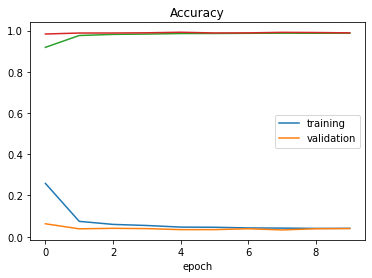

In [19]:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    plt.title('Loss')
    plt.xlabel('epoch')
     
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training','validation'])
    plt.title('Accuracy')
    plt.xlabel('epoch')

Test score: 0.03479122743010521
Test accuracy: 0.9908999800682068
(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [2]


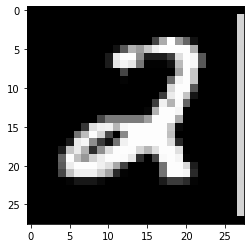

In [24]:
    score = model.evaluate(X_test, y_test, verbose=0)
     
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    #predict internet number
    import requests
    from PIL import Image
    url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
     
    r = requests.get(url, stream=True)
    img = Image.open(r.raw)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
     
    import cv2
     
    img = np.asarray(img)
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
     
    img = img/255
    img = img.reshape(1,28,28,1)
    print(img.shape)
     
    print(img.shape)
    print("predicted digit: "+str(model.predict_classes(img)))

(1, 24, 24, 30)
(1, 10, 10, 15)


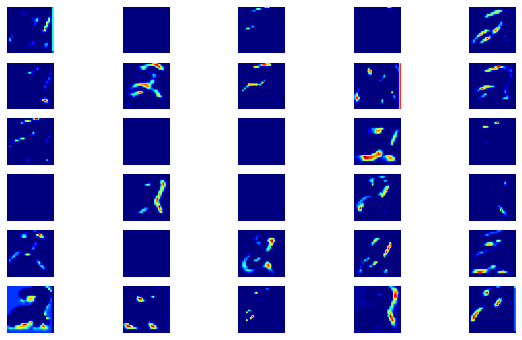

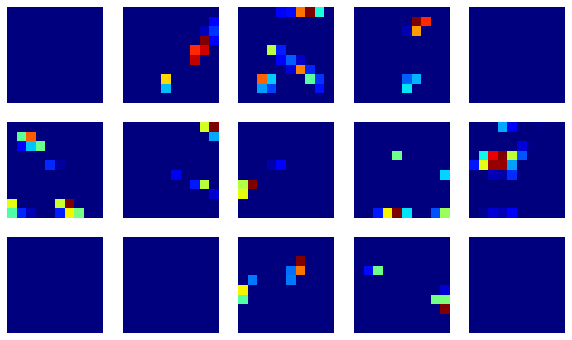

In [23]:
    layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
    layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
     
    visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
     
    print(visual_layer1.shape)
    print(visual_layer2.shape)
     
    #layer 1
    plt.figure(figsize=(10, 6))
    for i in range(30):
        plt.subplot(6, 5, i+1)
        plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
        plt.axis('off')
     
    #layer 2
    plt.figure(figsize=(10, 6))
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
        plt.axis('off')